# CASE STUDY: RFM ANALYSIS

A. Objectives:

    1. Churn Analysis: Analyze customer churn based on Recency (R) of their purchases
    2. CLV Analysis: Using historical data to find Frequency (F) and Monetary (M) to calculate CLV of buyers
    3. Customer Segmentation: Segment customers into different groups based on their purchasing behavior using the RFM model

B. Datasets: Including 8 columns x 541909 rows

    1. InvoiceNo: Unique identifier for each transaction.
    2. StockCode: Identifier for products.
    3. Description: Name of the product.
    4. Quantity: Number of units purchased in a transaction.
    5. InvoiceDate: Date and time of the transaction.
    6. UnitPrice: Price per product unit.
    7. CustomerID: Unique identifier for the customer.
    8. Country: Country of the customer.

C. Case Study Questions:

    1. Which customers are more likely to churn based on their purchasing behavior?
    2. How can we estimate the future value each customer will bring to the business?
    3. Can we further segment customers into distinct groups?

D. Methodlogy:

    1. Calculate R,F,M: Which is the Input of Desciptive and Predictive analysis
        - TotalPrice = Quantity * UnitPrice: Total amount spent per transaction.
        - Recency: Time since the last transaction for each customer.
        - Frequency: Number of transactions per customer.
        - Monetary: Total amount spent by each customer.
    2. Models and Tools:
        - Probability alive and Predicted number of future transactions using BG/NBD (Beta Geometric/Negative Binomial Distribution).
        - Predicted monetary value per transaction using the Gamma-Gamma model.
        - Segmentation Analysis using KMeans Model (Unsupervised Learning)
    3. Output:
        - Probability alive and Predicted number of future transactions is used for Churn Rate Analysis
        - Predicted number of future transactions and Predicted monetary value per transaction are used for Predicted LV of buyer, beloning to LV Buyer Analysis

E. Outline:
    
    1. Data Preprocessing
    2. FRM Calculation
    3. Churn Rate Analysis - Predictive Analysis Using BG/NBD 
    4. CLV Analysis - Predictive Analysis Using Gamma-Gamma
    5. KMeans Clustering for Segmentation Clustering
    6. ConclustionS and Recommendations:

In [3]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from lifetimes import BetaGeoFitter, GammaGammaFitter
import datetime as dt

In [4]:
# Load dateset
# This dataset is already excluded some gift and error transactions but still need to adject once more time
frm_data = pd.read_csv('data_frm_c.csv')
frm_data.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,12/1/2010 8:26,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,12/1/2010 8:26,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,12/1/2010 8:34,1.69,13047.0,United Kingdom


## 1. Data Preprocessing

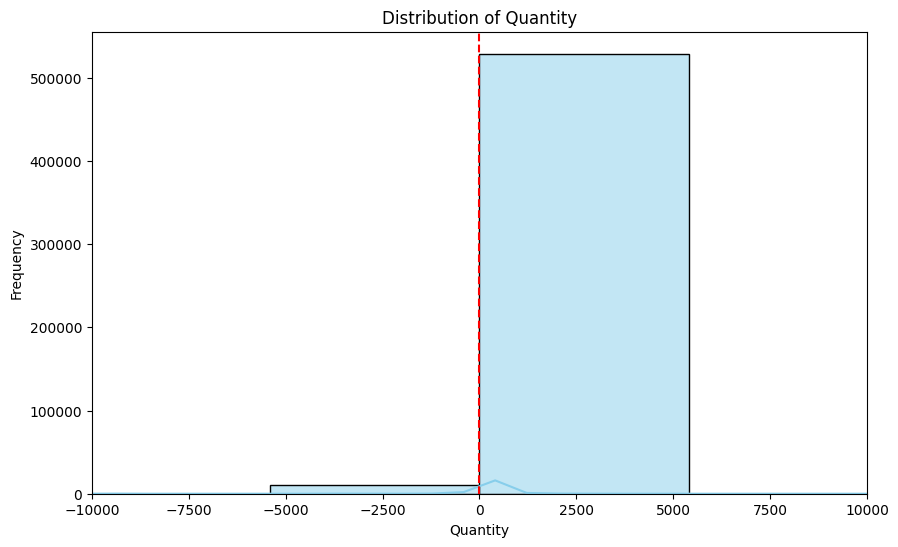

In [5]:
# Visualize quantity to check error Quantity
plt.figure(figsize=(10, 6))
sns.histplot(frm_data['Quantity'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Quantity')
plt.xlabel('Quantity')
plt.ylabel('Frequency')
plt.axvline(0, color='red', linestyle='--')  
plt.xlim(-10000, 10000)  # Set the length of x, ranging from -10000 to 10000
plt.show()

In [6]:
# Group by Country
country_valid = frm_data.groupby(['Country']).count()
country_valid 

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID
Country,,,,,,,
Australia,1257,1257,1257,1257,1257,1257,1257
Austria,387,387,387,387,387,387,387
Bahrain,19,19,19,19,19,19,17
Belgium,1971,1971,1971,1971,1971,1971,1971
Brazil,32,32,32,32,32,32,32
Canada,150,150,150,150,150,150,150
Channel Islands,753,753,753,753,753,753,753
Cyprus,619,619,619,619,619,619,619
Czech Republic,28,28,28,28,28,28,28


In [7]:
# Exclude some error data in dataset
frm_off = frm_data[(frm_data['Quantity']>0) & (frm_data['Country'] != 'Unspecified') & (frm_data['UnitPrice'] >0)]
frm_off

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
539047,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
539048,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
539049,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
539050,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


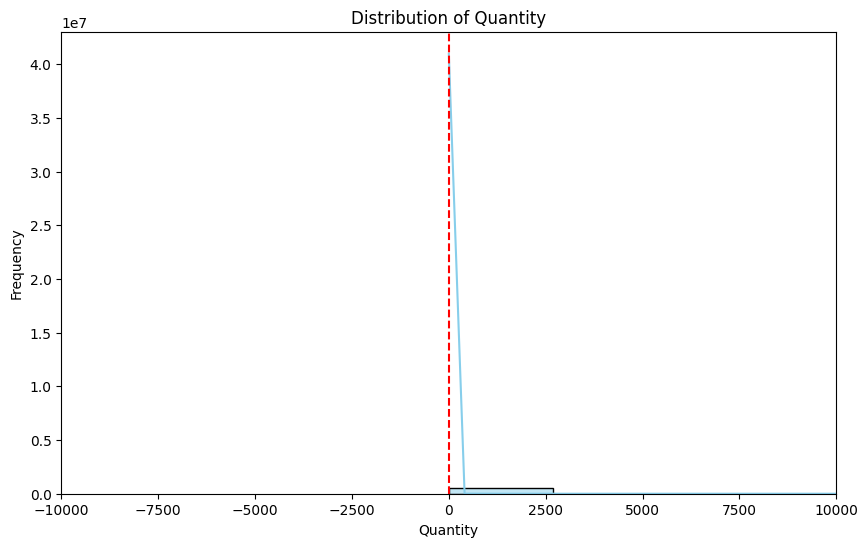

In [8]:
# Visualize quantity to check error Quantity (After removing negative or 0 values)
plt.figure(figsize=(10, 6))
sns.histplot(frm_off['Quantity'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Quantity')
plt.xlabel('Quantity')
plt.ylabel('Frequency')
plt.axvline(0, color='red', linestyle='--')  
plt.xlim(-10000, 10000)  # Set the length of x, ranging from -10000 to 10000
plt.show()

In [9]:
# After removing Unspecified Country
country_valid = frm_off.groupby(['Country']).count()
country_valid 

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID
Country,,,,,,,
Australia,1181,1181,1181,1181,1181,1181,1181
Austria,384,384,384,384,384,384,384
Bahrain,18,18,18,18,18,18,17
Belgium,1935,1935,1935,1935,1935,1935,1935
Brazil,32,32,32,32,32,32,32
Canada,150,150,150,150,150,150,150
Channel Islands,744,744,744,744,744,744,744
Cyprus,612,612,612,612,612,612,612
Czech Republic,24,24,24,24,24,24,24


In [10]:
# Check missing values
print(frm_data.isna().sum())

InvoiceNo           0
StockCode           0
Description      1446
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     134050
Country             0
dtype: int64


In [11]:
# Check missing values after removing error
print(frm_off.isna().sum())

InvoiceNo           0
StockCode           0
Description         0
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     131219
Country             0
dtype: int64


There are still 131219 missing values in CustomerID column

In [12]:
rfm = frm_off[frm_off['CustomerID'].notnull()]
print(rfm.isna().sum())

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64


NO MORE MISSING VALUE

In [13]:
rfm['CustomerID'] = rfm['CustomerID'].astype('Int64')

In [14]:
rfm.info()

<class 'pandas.core.frame.DataFrame'>
Index: 396093 entries, 0 to 539051
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    396093 non-null  object 
 1   StockCode    396093 non-null  object 
 2   Description  396093 non-null  object 
 3   Quantity     396093 non-null  int64  
 4   InvoiceDate  396093 non-null  object 
 5   UnitPrice    396093 non-null  float64
 6   CustomerID   396093 non-null  Int64  
 7   Country      396093 non-null  object 
dtypes: Int64(1), float64(1), int64(1), object(5)
memory usage: 27.6+ MB


In [15]:
rfm.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850,United Kingdom


## 2. FRM Calculation

In [16]:
rfm['TotalPrice'] = rfm['Quantity'] * rfm['UnitPrice']
rfm['InvoiceDate'] = pd.to_datetime(rfm['InvoiceDate'])
# Snapshot date 
Now = rfm['InvoiceDate'].max() + pd.Timedelta(days=1)

# Calculate RFM ratio
rfm_agg = rfm.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (Now - x.max()).days,  # Recency
    'InvoiceNo': 'nunique',  # Frequency
    'TotalPrice': 'sum'  # Monetary
}).reset_index()

# Change column names
rfm_agg.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary']

rfm_agg.head()

,CustomerID,Recency,Frequency,Monetary
0,12346,326,1,77183.60
1,12347,2,7,4310.00
2,12348,75,4,1437.24
3,12349,19,1,1457.55
4,12350,310,1,294.40


## 3. Churn Analysis Using BG/NBD 

In [17]:
first_purchase = rfm.groupby('CustomerID')['InvoiceDate'].min().reset_index()
first_purchase.columns = ['CustomerID', 'FirstPurchaseDate']

rfm_agg = rfm_agg.merge(first_purchase, on='CustomerID')

rfm_agg['T'] = (Now - rfm_agg['FirstPurchaseDate']).dt.days


In [18]:
print(rfm_agg[['Frequency', 'Recency', 'T']].describe())
print(rfm_agg[['Frequency', 'Recency', 'T']].isnull().sum())

         Frequency      Recency            T
count  4330.000000  4330.000000  4330.000000
mean      4.248037    92.667436   223.346882
std       7.638210   100.213449   117.911193
min       1.000000     1.000000     1.000000
25%       1.000000    18.000000   113.000000
50%       2.000000    51.000000   249.000000
75%       5.000000   143.000000   327.000000
max     206.000000   374.000000   374.000000
Frequency    0
Recency      0
T            0
dtype: int64


In [19]:
import lifetimes
print(lifetimes.__version__)

0.11.3


In [20]:
# BG/NBD
bgf = BetaGeoFitter()
bgf.fit(rfm_agg['Frequency'], rfm_agg['Recency'], rfm_agg['T'])

# Predict frequency of customers in the next 52 weeks (about next 1 year)
rfm_agg['Predicted_Transactions'] = bgf.conditional_expected_number_of_purchases_up_to_time(
    52, rfm_agg['Frequency'], rfm_agg['Recency'], rfm_agg['T'])

# Calculate the probability alive
rfm_agg['Probability_alive'] = bgf.conditional_probability_alive(
    rfm_agg['Frequency'], rfm_agg['Recency'], rfm_agg['T']
)

# Show result
print(rfm_agg[['Predicted_Transactions', 'Probability_alive']])

      Predicted_Transactions  Probability_alive
0               1.660805e-01       8.456001e-01
1               7.571030e-16       7.964188e-16
2               4.368268e-03       7.449112e-03
3               1.973600e+00       8.456001e-01
4               1.744023e-01       8.456001e-01
...                      ...                ...
4325            1.938267e-01       8.456001e-01
4326            2.926213e-01       8.456001e-01
4327            1.000708e-02       1.181365e-02
4328            3.276508e-30       1.525604e-30
4329            2.787089e-02       3.590432e-02

[4330 rows x 2 columns]


      CustomerID  Predicted_Transactions  Probability_alive
2673       16000                6.164437           0.850674
4220       18139                5.609104           0.857688
296        12713                5.463257           0.845600
713        13298                5.463257           0.845600
1633       14569                5.463257           0.845600
...          ...                     ...                ...
2258       15427                1.705390           0.644779
424        12890                1.675739           0.845600
819        13449                1.675739           0.845600
1702       14666                1.675739           0.845600
1737       14714                1.675739           0.845600

[200 rows x 3 columns]


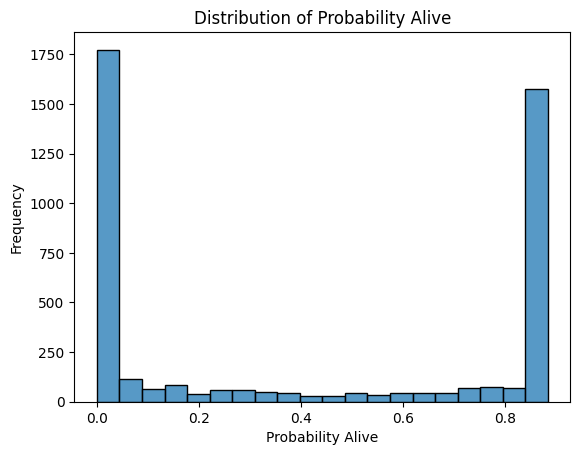

In [21]:
top_customers = rfm_agg.nlargest(200, 'Predicted_Transactions')
print(top_customers[['CustomerID', 'Predicted_Transactions', 'Probability_alive']])

# Probabiloty Alive Distribution
sns.histplot(rfm_agg['Probability_alive'], bins=20)
plt.title('Distribution of Probability Alive')
plt.xlabel('Probability Alive')
plt.ylabel('Frequency')
plt.show()

The bimodal distribution in customer probabilities indicates two major customer groups: 

(1) one with a high likelihood of being active

(2) another with a higher risk of churn.

#### Interpretation:

- For business, they are alive: Most customers are still active (high probability of being alive), with significant peaks between the 0.8-0.9 range, showing approximately 1500 customers who are likely to continue purchasing.

- Customers at high-rate churn: The group with a probability of being alive in the 0-0.1 range contains around 1800 customers, indicating that this segment has likely churned or is close to churn.

In [22]:
# Identify threshold for Probability Alive
threshold = 0.5

# Classify customers by churn
rfm_agg['Churn'] = np.where(rfm_agg['Probability_alive'] < threshold, 'Churn', 'No Churn')

# Calculate churn rate
churn_rate = rfm_agg['Churn'].value_counts(normalize=True)

# Result
print("Churn Rate:")
print(round(churn_rate,2))

Churn Rate:
Churn
Churn       0.54
No Churn    0.46
Name: proportion, dtype: float64


 With a churn rate of 54%, more than half of the customers have stopped engaging with the business.

## 4. CLV Buyer Analysis Using Gamma-Gamma
    

In [23]:
rfm_agg = rfm_agg[rfm_agg['Monetary'] > 0]

ggf = GammaGammaFitter(1)

ggf.fit(rfm_agg['Frequency'], rfm_agg['Monetary'])

# Predict average monetary in future
rfm_agg['Predicted_Avg_Monetary'] = ggf.conditional_expected_average_profit(rfm_agg['Frequency'], rfm_agg['Monetary'])

# Result
rfm_agg[['CustomerID', 'Monetary', 'Predicted_Avg_Monetary']].head()

,CustomerID,Monetary,Predicted_Avg_Monetary
0,12346,77183.60,-41692.308429
1,12347,4310.00,7272.164097
2,12348,1437.24,5004.831024
3,12349,1457.55,-787.445749
4,12350,294.40,-159.148208


In [24]:
# Calculate CLV
rfm_agg['CLV'] = rfm_agg['Predicted_Transactions'] * rfm_agg['Predicted_Avg_Monetary']

# Result
rfm_agg[['CustomerID', 'Predicted_Transactions', 'Predicted_Avg_Monetary', 'CLV']].head()

,CustomerID,Predicted_Transactions,Predicted_Avg_Monetary,CLV
0,12346,1.660805e-01,-41692.308429,-6.924280e+03
1,12347,7.571030e-16,7272.164097,5.505777e-12
2,12348,4.368268e-03,5004.831024,2.186244e+01
3,12349,1.973600e+00,-787.445749,-1.554103e+03
4,12350,1.744023e-01,-159.148208,-2.775582e+01


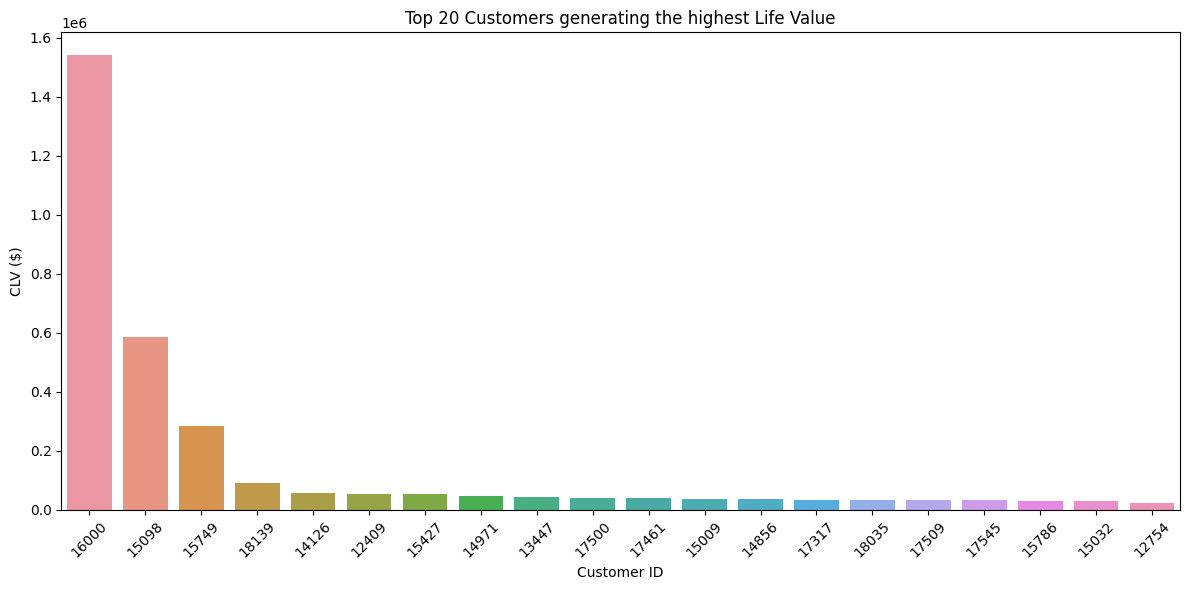

In [25]:
# Choose data of 20 customers having the highest LV
top_clv_customers = rfm_agg[['CustomerID', 'CLV']].nlargest(20, 'CLV').sort_values(by='CLV',ascending=False)

# Bar Chart: CLV
plt.figure(figsize=(12, 6))
sns.barplot(x='CustomerID', y='CLV', data=top_clv_customers,order=top_clv_customers['CustomerID'])
plt.title('Top 20 Customers generating the highest Life Value')
plt.xlabel('Customer ID')
plt.ylabel('CLV ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### Data Interpretation:

- The top 20 customers contribute significantly to the overall revenue. With CLV values ranging from $100,000 to $1.6 million, this small group represents a large proportion of the business's profitability.

- The variation in Customer IDs suggests that these high-value customers are distributed across different customer segments and are not confined to a single demographic or behavior group.

## 5. KMeans Clustering for Segmentation Clustering


In [26]:
# Import libraries for Clusting
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline


In [27]:
rfm_agg.reset_index().head()

,index,CustomerID,Recency,Frequency,Monetary,FirstPurchaseDate,T,Predicted_Transactions,Probability_alive,Churn,Predicted_Avg_Monetary,CLV
0,0,12346,326,1,77183.60,2011-01-18 10:01:00,326,1.660805e-01,8.456001e-01,No Churn,-41692.308429,-6.924280e+03
1,1,12347,2,7,4310.00,2010-12-07 14:57:00,367,7.571030e-16,7.964188e-16,Churn,7272.164097,5.505777e-12
2,2,12348,75,4,1437.24,2010-12-16 19:09:00,358,4.368268e-03,7.449112e-03,Churn,5004.831024,2.186244e+01
3,3,12349,19,1,1457.55,2011-11-21 09:51:00,19,1.973600e+00,8.456001e-01,No Churn,-787.445749,-1.554103e+03
4,4,12350,310,1,294.40,2011-02-02 16:01:00,310,1.744023e-01,8.456001e-01,No Churn,-159.148208,-2.775582e+01


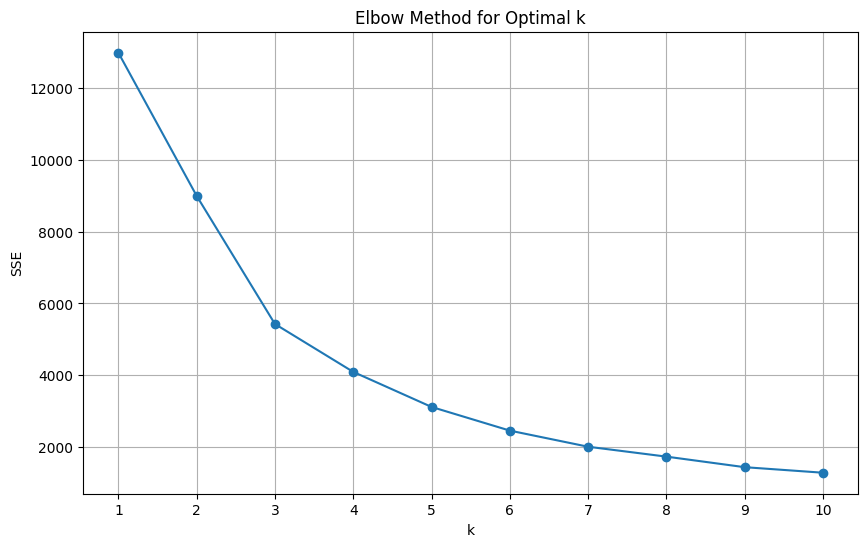

In [28]:
# Using Elbow method to optimize parameter of KMeans
elbow = []
scaler = StandardScaler()

for k in range(1,11):
    pipeline = make_pipeline(scaler, KMeans(n_clusters=k, random_state=0))
    pipeline.fit(rfm_agg[['Recency', 'Frequency', 'Monetary']])
    elbow.append(pipeline.named_steps['kmeans'].inertia_)

# Trực quan hóa WCSS để xác định k tối ưu
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), elbow, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('k')
plt.ylabel('SSE')
plt.xticks(range(1, 11))
plt.grid()
plt.show()


From Elbow Method, choosing k=3 as the optimal parameter

In [29]:
# Start modeling
kmeans = KMeans(n_clusters=3, random_state=42)
samples = rfm_agg[['Recency', 'Frequency', 'Monetary']]
pipeline = make_pipeline(scaler,kmeans)

labels = pipeline.fit_predict(samples)
rfm_cluster = rfm_agg.iloc[:,:4]
rfm_cluster

rfm_cluster['Cluster'] = kmeans.labels_
rfm_cluster.head(5)

,CustomerID,Recency,Frequency,Monetary,Cluster
0,12346,326,1,77183.60,1
1,12347,2,7,4310.00,0
2,12348,75,4,1437.24,0
3,12349,19,1,1457.55,0
4,12350,310,1,294.40,1


In [30]:
rfm_cluster.groupby('Cluster').agg({
        'Recency':'mean',
        'Frequency':'mean',
        'Monetary':'mean'
}).round(2)

,Recency,Frequency,Monetary
Cluster,,,
0,41.35,4.65,1841.01
1,247.35,1.57,626.15
2,6.12,67.84,85941.28


#### Data Interpretation:

(1) Cluster 0 (Mid-range customers): Customers in this group have moderately high recency (41.35 days since last purchase), moderate frequency (4.65 transactions), and a decent monetary value ($1841.01). They represent active customers who engage frequently but spend moderately.

(2) Cluster 1 (Inactive or at-risk customers): This group shows high recency (247.35 days since last purchase), low frequency (1.57 transactions), and lower monetary value ($626.15). This cluster is likely churned or close to churning.

(3) Cluster 2 (High-value customers): These customers recently purchased or engaged with business's products and servvices (6.12 days since last purchase), very high frequency (67.84 transactions), and significantly high monetary value ($85,941.28). They represent your most valuable and active segment.

c:\Users\a\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


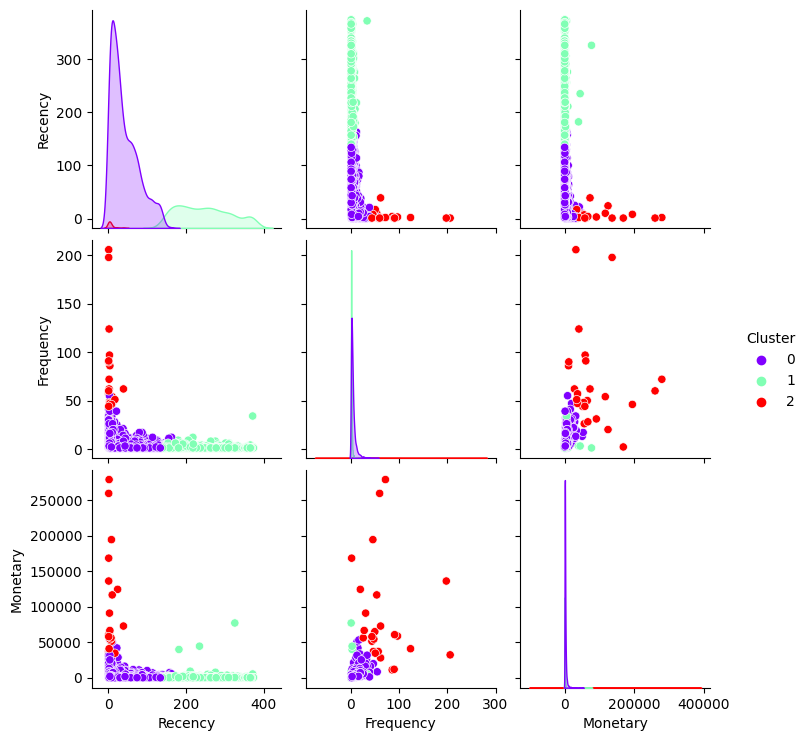

In [31]:
sns.pairplot(rfm_cluster, vars=['Recency', 'Frequency', 'Monetary'], hue='Cluster', palette='rainbow')
plt.show()

## 6. Conclustions and Recommendations:

### Summary of Key Insights:

1. Customer Activity (Alive vs. Churned):

    - Active Customers: 1500 customers show a high probability (0.8-0.9) of continued engagement. These are vital for driving revenue.

    - Churned Customers: 1800 customers have a low probability (0-0.1) of being alive, indicating a high churn risk and need for retention efforts.

2. Top Customers’ Contribution:

    - Top 20 Customers contribute disproportionately to revenue with CLTV between $100,000 and $1.6 million. Retaining and nurturing this group is crucial for profitability.

    - Diverse IDs: High-value customers span various segments, suggesting opportunities to acquire similar high-value customers.

3. Customer Segmentation:

    - Cluster 0 (Mid-range customers): Moderate engagement, potential for higher spending through upselling/cross-selling.

    - Cluster 1 (At-risk customers): High churn risk; re-engage through targeted offers.

    - Cluster 2 (High-value customers): Most valuable and engaged; prioritize retention with personalized services.


### Recommendation Action Plan:

1. Retention Efforts for Churned Customers

    - Target Group: 1800 customers with low probability (0-0.1) of being alive.

    - Actions:
        + Win-back campaigns: Offer exclusive discounts, time-sensitive offers, or reactivation emails.

        + Personalized communication: Send tailored messages highlighting new products or services based on their past behavior.
        
        + Churn prevention alerts: Set up alerts for early warning signs (e.g., inactivity) and intervene with offers before full churn.

2. Nurture High-Value Customers

    - Target Group: Top 20 customers with CLTV between $100,000 and $1.6 million.

    - Actions:
        + VIP program: Offer personalized rewards, early access to products, and premium support services.

        + Dedicated account managers: Provide top-tier service and regular check-ins to maintain engagement.

        + Referral incentives: Encourage these customers to refer similar high-value clients through attractive referral programs.

3. Upsell and Cross-Sell to Mid-Range Customers

    - Target Group: Cluster 0 (Moderate engagement, Recency: 41.35 days, Frequency: 4.65).

    - Actions:
        + Cross-sell recommendations: Introduce complementary products based on past purchases.

        + Upselling strategies: Highlight premium products or services during purchase flows.

        + Loyalty incentives: Use loyalty points or membership benefits to encourage more frequent purchases.

4. Re-engagement of At-Risk Customers
    - Target Group: Cluster 1 (At-risk, Recency: 247.35 days, low frequency).

    - Actions:

        + Time-sensitive promotions: Engage with limited-time offers and discounts to motivate immediate action.

        + Surveys and feedback: Gather feedback on why they disengaged and tailor re-engagement efforts accordingly.

        + Reminder emails: Send reminders of items left in their cart or notify them of product restocks.

5. Strengthen Customer Retention for High-Value Cluster
    - Target Group: Cluster 2 (High-value, low recency, high frequency, and monetary value).

    - Actions:
        
        + Exclusive offers: Provide special, limited-edition products or experiences.
        + Priority service: Offer personalized customer support, shipping benefits, or priority services to retain loyalty.
        + Regular engagement: Keep them engaged with new product launches, sneak peeks, and loyalty rewards.